In [16]:
import re
import matplotlib.pyplot as plt
import numpy as np

file_path = 'FlySimOut.txt'

In [17]:
# Regex patterns to match the lines and capture the timestamps
pattern_send = r"GCS Send Timestamp: (\d+\.\d+)"
pattern_current = r"GCS Current Timestamp: (\d+\.\d+)"

# List to store all the timestamp differences
differences = []
timestamp_send = []
timestamp_current= []

# Iterate over the lines
with open(file_path, 'r') as file:
    for line in file:
        # Search for the pattern "GCS Send Timestamp:"
        match_send = re.search(pattern_send, line)
        if match_send:
            # Extract the timestamp value
            timestamp_send.append(float(match_send.group(1)))

        # Search for the pattern "GCS Current Timestamp:"
        match_current = re.search(pattern_current, line)
        if match_current:
            # Extract the timestamp value
            timestamp_current.append(float(match_current.group(1)))

# Calculate the differences
for i in range(len(timestamp_current)):
    differences.append(timestamp_current[i] - timestamp_send[i])

start = differences[:74]
end = differences[74:]

x = timestamp_current[-1] - timestamp_current[84]
print(timestamp_current[-1], timestamp_current[84])
print("Total time difference: " + str(x) + " s")

meters = 185
print("Total distance difference: " + str(meters) + " m")

# Print the differences
print(len(differences), len(end))

1703781729.222202 1703781472.358811
Total time difference: 256.86339116096497 s
Total distance difference: 185 m
613 539


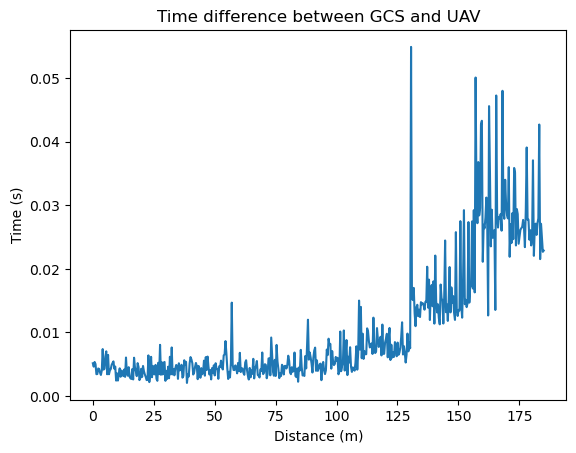

In [18]:
size = 578-74
y = np.linspace(0, meters, size)
plt.plot(y, end[:size])
plt.xlabel("Distance (m)")
plt.ylabel("Time (s)")
plt.title("Time difference between GCS and UAV")
plt.show()

In [19]:

delay_times = []

with open(file_path, 'r') as file:
    for line in file:
        # Search for the pattern "Simulated Network Delay:"
        if "Simulated Network Delay:" in line:
            # Extract the time value using regular expression
            match = re.search(r'\d+\.\d+', line)
            if match:
                delay_time = float(match.group())
                delay_times.append(delay_time* 1000)

delay_times = delay_times[74:578] 
meters = np.linspace(0, 185, len(delay_times))

In [20]:
print(delay_times[1:10])

[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


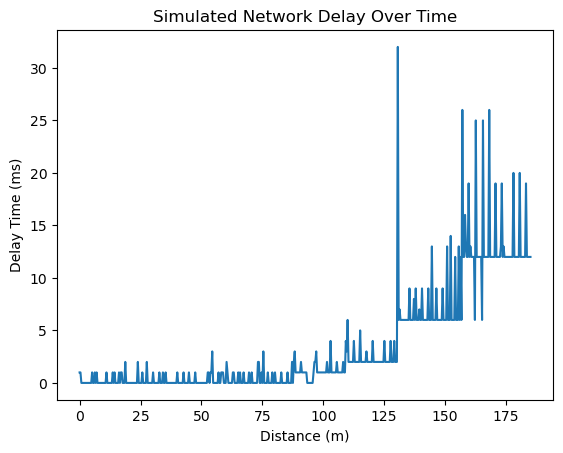

In [21]:
plt.plot(meters,delay_times )
plt.title('Simulated Network Delay Over Time')
plt.xlabel('Distance (m)')
plt.ylabel('Delay Time (ms)')
plt.show()